In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model

#import csv file from the folder using pandas

In [2]:
dataframe = pd.read_csv("/home/unni/Downloads/Python CSV/HeightWeight.csv")
dataframe

,Height (cms),Weight (Kgs)
0,90,36.1
1,91,40.1
2,92,38.7
3,93,45.7
4,94,42.4
...,...,...
116,206,94.9
117,207,101.6
118,208,104.1
119,209,96.2


#plot the data

/home/unni/my_project_work/my_project_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/unni/my_project_work/my_project_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


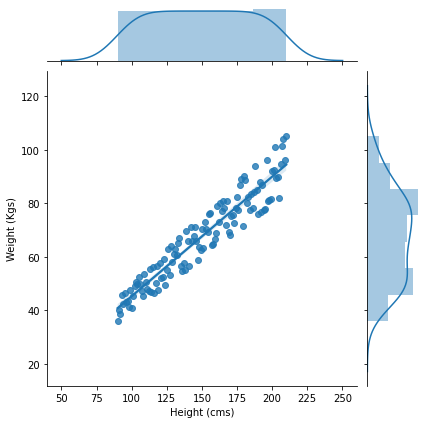

In [3]:
sns.jointplot(dataframe['Height (cms)'], dataframe['Weight (Kgs)'], data=dataframe, kind="reg")

#split arrays into random train and test subsets. Reshape each subset 


(-1,1)===> "-1" refers to the entire elements in the array and "1" refers to represent the entire elements in a single column.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(dataframe['Height (cms)'], dataframe['Weight (Kgs)'], test_size = 0.2) 
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

# Linear Regression - scikit-learn

#model training and prediction

In [5]:
scikit_ln_model = linear_model.LinearRegression()
scikit_ln_model.fit(x_train,y_train)

y_prediction = scikit_ln_model.predict(x_test)

Linear coefficient and intercept

In [6]:
print('linear coefficient_scikit',scikit_ln_model.coef_)
print('linear intercept_scikit',scikit_ln_model.intercept_)

linear coefficient_scikit [[0.43960813]]
linear intercept_scikit [1.92440536]


MSE and R2 

In [7]:
print('mean_squared_error', metrics.mean_squared_error(y_test, y_prediction, squared=True))
print('r2_score', metrics.r2_score(y_test, y_prediction)  )    

mean_squared_error 24.639672189645285
r2_score 0.9173175750783679


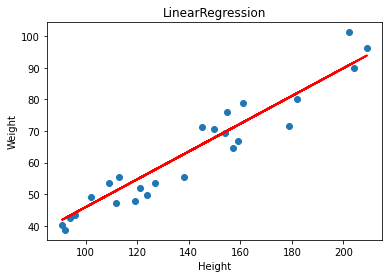

In [8]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, color='red', linewidth=2)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("LinearRegression")
plt.show()

# SGD Linear Regressor - scikit-learn


In [9]:
scikit_sgd_model= linear_model.SGDRegressor(loss="huber", penalty='l2', max_iter=1000, tol=0.001)
scikit_sgd_model.fit(x_train, y_train.ravel())
sklearn_sgd_predictions = scikit_sgd_model.predict(x_test)


SGD coefficient and intercept

In [10]:
print('SGD coefficient_scikit',scikit_sgd_model.coef_)
print('SGD intercept_scikit',scikit_sgd_model.intercept_)

SGD coefficient_scikit [0.43887787]
SGD intercept_scikit [0.00882264]


#SGD MSE and R2 

In [11]:
print('mean_squared_error', metrics.mean_squared_error(y_test, sklearn_sgd_predictions, squared=True))
print('r2_score', metrics.r2_score(y_test, sklearn_sgd_predictions))

mean_squared_error 25.54297207408336
r2_score 0.9142864054953506


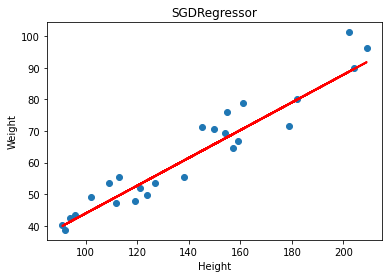

In [12]:
plt.scatter(x_test, y_test)
plt.plot(x_test, sklearn_sgd_predictions, color='red', linewidth=2)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("SGDRegressor")
plt.show()

# Least-squares estimation


Refer to the Least-squares estimation and related techniques section in for the formula to create the model
https://en.wikipedia.org/wiki/Linear_regression#:~:text=In%20statistics%2C%20linear%20regression%20is,is%20called%20simple%20linear%20regression.

Refer https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/ to understand formula for Mean Square Error (MSE) and R2 score

In [13]:
def theta_cal(x_train, y_train):
    dat_row_num = x_train.shape[0]
    bias = np.ones((dat_row_num,1))
    x_train_bias = np.append(bias,x_train, axis=1)
    trans_x_train_bias = x_train_bias.transpose()

    
    theta_1 = np.linalg.inv(np.dot(trans_x_train_bias, x_train_bias))
    theta_2 = np.dot(theta_1, trans_x_train_bias) 
    theta   = np.dot(theta_2, y_train)
    
    return theta

#Prediction

In [14]:
def prediction_func(slope, intercept, x_test):
    dat_row_size = len(x_test)
    y_prediction = []
    for i in range(dat_row_size):
        y_prediction.append (slope*x_test[i] + intercept)
    return y_prediction


#MSE

In [15]:
def mse_cal(y_prediction, y_test):
    dat_test_size = len(y_test)
    mse = (np.sum((y_prediction - y_test)**2))/dat_test_size
    return mse

#R2 


In [16]:
def rsqr_cal(y_prediction, y_test):
    dat_test_size = len(y_test)
    mean_obs_data = np.sum(y_test)/dat_test_size
    sum_of_sqrs = np.sum((y_test - mean_obs_data)**2)
    res_sum_of_sqrs = np.sum(y_test - y_prediction)**2
    rsqr = 1-(res_sum_of_sqrs/sum_of_sqrs)
    return rsqr

#Value pass

In [17]:
theta = theta_cal(x_train, y_train)
slope = theta[1]
intercept = theta[0]
print('theta',theta)
print('slope',slope)
print('intercept',intercept)

theta [[1.92440536]
 [0.43960813]]
slope [0.43960813]
intercept [1.92440536]


In [18]:
y_prediction = prediction_func(slope, intercept, x_test)
mse = mse_cal(y_prediction, y_test)
rsqr = rsqr_cal(y_prediction, y_test)

print('mse',mse)
print('rsqr',rsqr)

mse 24.639672189645495
rsqr 0.9466282006280518


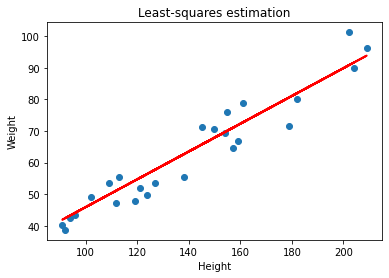

In [19]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, color='red', linewidth=2)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Least-squares estimation")
plt.show()